In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Load dataset
df = pd.read_excel("cleaned_ready.xlsx")

# Quick check
print(df.shape)
df.head()


(5583, 24)


,sex,age,Education,income,BMI,chronic_disease,smoking,drinking_alcohol,IPAQ,PHQ9_score,...,ISI_score,weekly_total_MET,gender,age_group_3,age_group_6,derpession_label,income_group_label,BMI_category,BMI_category_label,insomnia_severity
0,1,27.249315,4,5,30.864198,0,1,1,2,0,...,0,2346.0,Maele,18-40,18-30,not_depressed,Very High,4,Obese,No insomnia
1,1,76.030137,2,1,23.306680,1,0,0,3,0,...,0,4746.0,Maele,60+,70+,not_depressed,Very Low,2,Normal,No insomnia
2,1,68.246575,2,1,25.951557,1,0,0,2,0,...,0,2226.0,Maele,60+,60-70,not_depressed,Very Low,3,Overweight,No insomnia
3,1,44.698630,4,3,24.489796,0,0,0,2,0,...,0,1038.0,Maele,40-60,40-50,not_depressed,Middle,3,Overweight,No insomnia
4,0,42.904110,2,2,21.359306,0,0,0,2,2,...,8,1533.0,Female,40-60,40-50,not_depressed,Low,2,Normal,Mild


In [2]:
df.columns

Index(['sex', 'age', 'Education', 'income', 'BMI', 'chronic_disease',
       'smoking', 'drinking_alcohol', 'IPAQ', 'PHQ9_score', 'depression_score',
       'depression_4', 'depression_binary', 'insomnia_4', 'ISI_score',
       'weekly_total_MET', 'gender', 'age_group_3', 'age_group_6',
       'derpession_label', 'income_group_label', 'BMI_category',
       'BMI_category_label', 'insomnia_severity'],
      dtype='object')

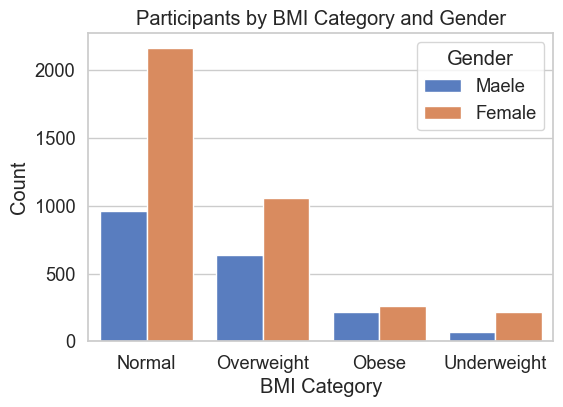

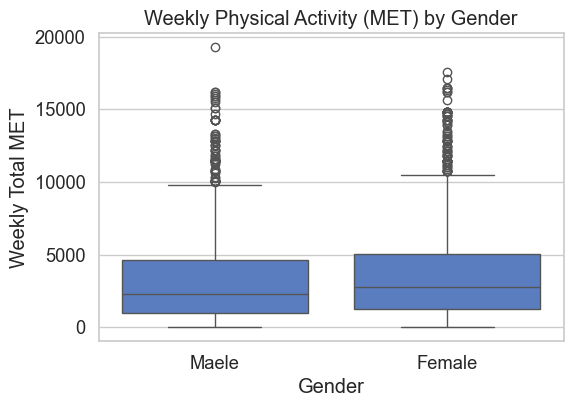

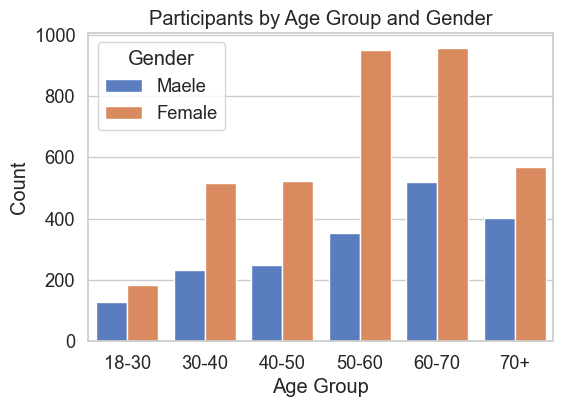

In [6]:

plt.figure(figsize=(6,4))
sns.countplot(
    data=df, 
    x="BMI_category_label", 
    hue="gender", 
    order=df["BMI_category_label"].value_counts().index  # descending order
)
plt.title("Participants by BMI Category and Gender")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# ========================================
# 2. Weekly MET Distribution by Gender
# ========================================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="gender", y="weekly_total_MET")
plt.title("Weekly Physical Activity (MET) by Gender")
plt.xlabel("Gender")
plt.ylabel("Weekly Total MET")
plt.show()

# ========================================
# 3. Age Group Distribution by Gender
# ========================================
Age_order=["18-30","30-40","40-50","50-60","60-70","70+"]
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="age_group_6",
    hue="gender",order= Age_order)
      
plt.title("Participants by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()



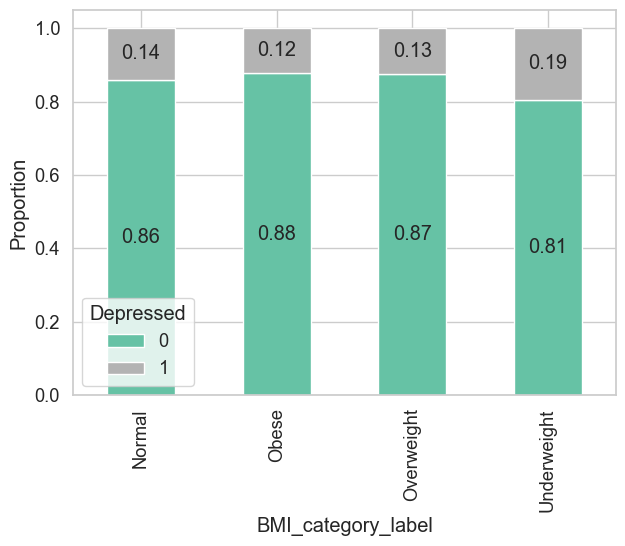

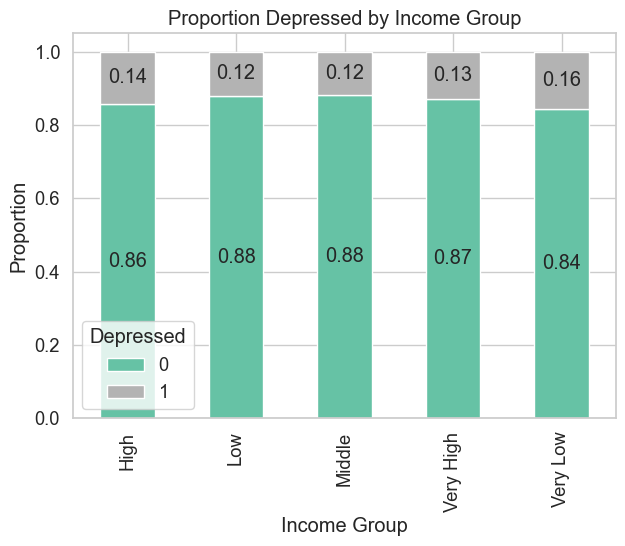

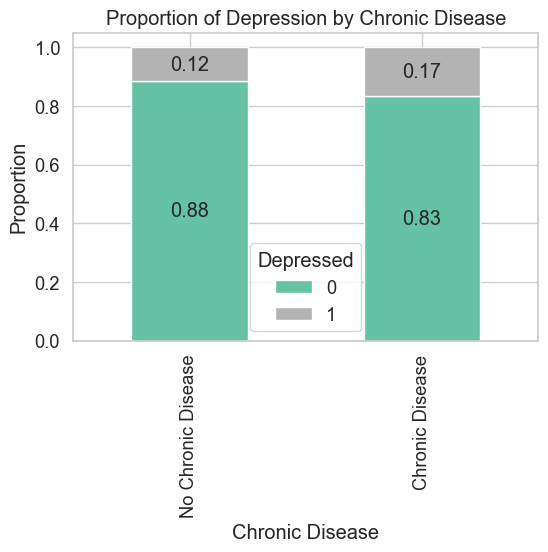

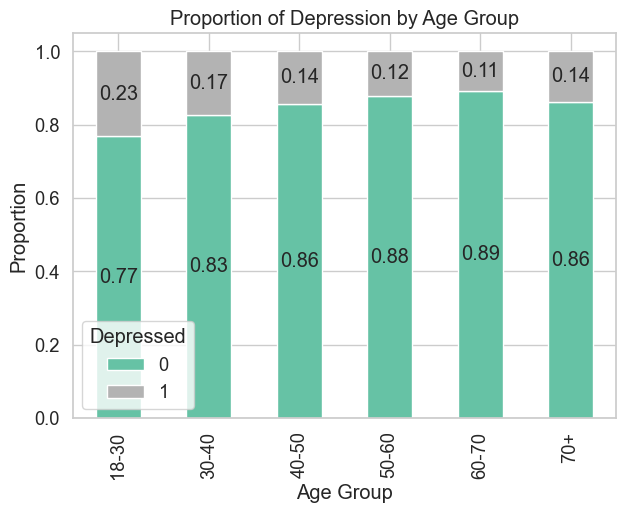

In [ ]:
ctab = pd.crosstab(df["BMI_category_label"], df["depression_binary"], normalize="index")
ax = ctab.plot(kind="bar", stacked=True, figsize=(7,5), colormap="Set2")

plt.ylabel("Proportion")
plt.legend(title="Depressed")

# Add text labels
for c in ax.containers:  
    ax.bar_label(c, fmt="%.2f", label_type="center")  # shows proportions inside bars

plt.show()



# Crosstab: proportion depressed/not per income group
ctab = pd.crosstab(df["income_group_label"], df["depression_binary"], normalize="index")

ax = ctab.plot(kind="bar", stacked=True, figsize=(7,5), colormap="Set2")

plt.title("Proportion Depressed by Income Group")
plt.ylabel("Proportion")
plt.xlabel("Income Group")
plt.legend(title="Depressed")

# Add proportion labels inside each bar
for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", label_type="center")  

plt.show()


# Crosstab: proportion depressed/not per chronic disease group
ctab = pd.crosstab(df["chronic_disease"], df["depression_binary"], normalize="index")

# Plot stacked bars
ax = ctab.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")

plt.title("Proportion of Depression by Chronic Disease")
plt.ylabel("Proportion")
plt.xlabel("Chronic Disease")

# Replace x-axis labels
ax.set_xticklabels(["No Chronic Disease", "Chronic Disease"])

plt.legend(title="Depressed")

# Add proportion labels inside each bar
for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", label_type="center")  

plt.show()



# Crosstab: proportion depressed/not per age group
ctab = pd.crosstab(df["age_group_6"], df["depression_binary"], normalize="index")

# Plot stacked bars
ax = ctab.plot(kind="bar", stacked=True, figsize=(7,5), colormap="Set2")

plt.title("Proportion of Depression by Age Group")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.legend(title="Depressed")

# Add proportion labels inside each bar
for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", label_type="center")  

plt.show()


C:\Users\hasan\AppData\Local\Temp\ipykernel_14872\359513385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="pastel")


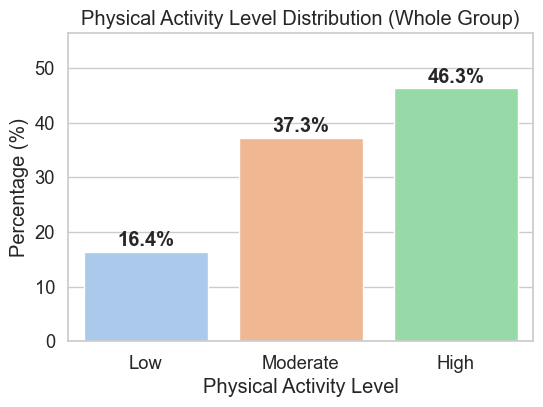

In [34]:
# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="pastel")

# Add percentage labels on top of bars
for i, v in enumerate(activity_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.ylabel("Percentage (%)")
plt.xlabel("Physical Activity Level")
plt.title("Physical Activity Level Distribution (Whole Group)")
plt.ylim(0, max(activity_counts.values)+10)
plt.show()




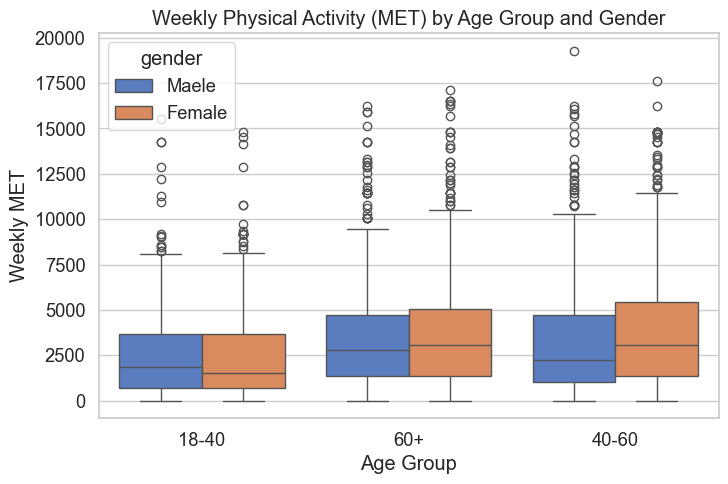

In [37]:
# Boxplot of weekly_total_MET by age group and gender
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="age_group_3", y="weekly_total_MET", hue="gender")
plt.title("Weekly Physical Activity (MET) by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Weekly MET")
plt.show()

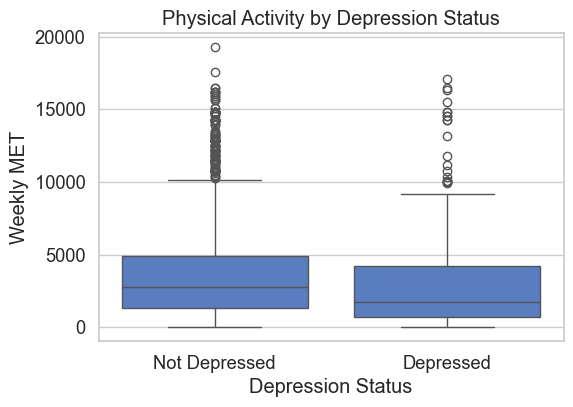

In [42]:
# Boxplot of weekly_total_MET by depression status with readable labels
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="depression_binary",
    y="weekly_total_MET"
)

# Replace x-axis ticks
plt.xticks([0,1], ["Not Depressed", "Depressed"])

plt.title("Physical Activity by Depression Status")
plt.xlabel("Depression Status")
plt.ylabel("Weekly MET")
plt.show()


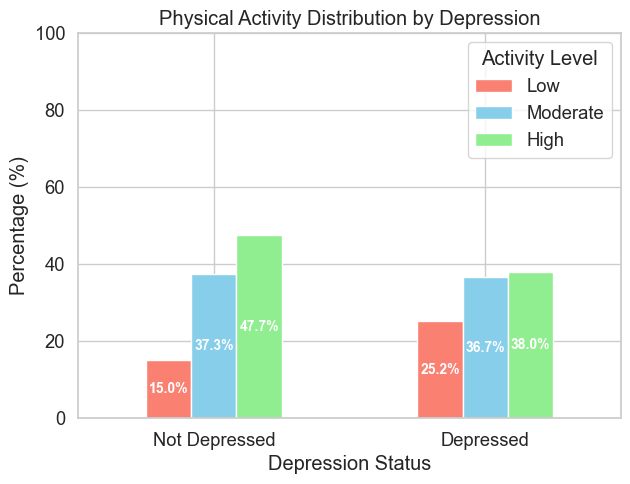

In [54]:
# Crosstab: depression_binary vs IPAQ_label
activity_depr = pd.crosstab(df["depression_binary"], df["IPAQ_label"], normalize='index') * 100
activity_depr = activity_depr[["Low","Moderate","High"]]  # order

# Plot vertical grouped bar chart
ax = activity_depr.plot(kind='bar', figsize=(7,5), stacked=False, color=["salmon","skyblue","lightgreen"])

plt.ylabel("Percentage (%)")
plt.xlabel("Depression Status")
plt.title("Physical Activity Distribution by Depression")
plt.xticks([0,1], ["Not Depressed","Depressed"], rotation=0)
plt.ylim(0, 100)

# Add percentages inside bars
for p in ax.patches:
    height = p.get_height()
    if height > 5:  # avoid putting text in very small bars
        ax.text(
            p.get_x() + p.get_width()/2,  # center of the bar
            height/2,                     # middle of the bar
            f"{height:.1f}%", 
            ha="center", va="center", 
            color="white", fontsize=10, fontweight="bold"
        )

plt.legend(title="Activity Level")
plt.show()
